# Statistical Thinking in Python  II

## Parameter estimation by optimization

When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. 

### How often do we get no-hitters?

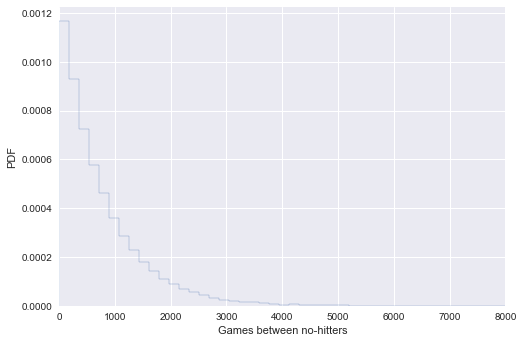

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


nohitter_times = np.genfromtxt('datasets/nohitter_times.txt', delimiter=',') #load ndarray from textfile

# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time, bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')
_ = plt.xlim(0, 8000)

# Show the plot
plt.show()

### Do the data follow our story?

In [15]:
def ecdf(data): # Empirical cumulative distribution functions
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n # n+1 because the last element is not inclusive. 0 <= Y <= 1

    return x, y

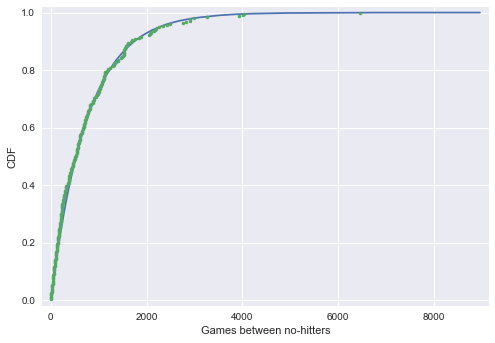

In [17]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()


### How is this parameter optimal?

Now sample out of an exponential distribution with τ being twice as large as the optimal τ. Do it again for τ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.


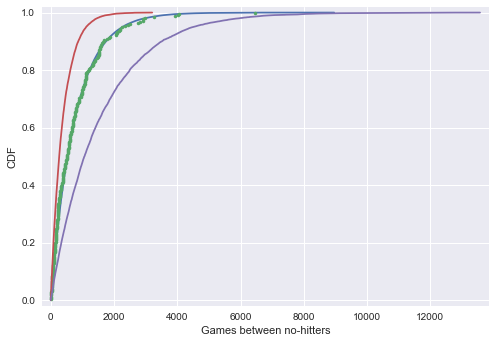

In [18]:
tau = 763.035856574

# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

## Linear regression by least squares

The process of finding the parameters for which the sum of the squares of the residuals is minimal is called **Least Squares**. Residuals is the distance from a point to the regression line which better fits the values. The line or first degree polynomial, is described by the bias or intercept, and the slope. In numpy the regression we use np.polyfit.


### EDA of literacy/fertility data

You can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

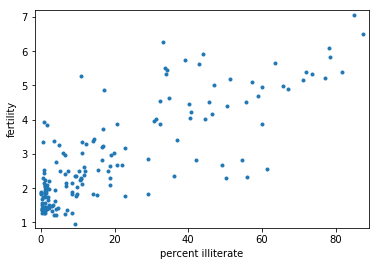

0.804132402682


In [66]:
illiteracy = np.genfromtxt('datasets/illiteracy.txt', delimiter=',') #load ndarray from textfile
fertility = np.genfromtxt('datasets/fertility.txt', delimiter=',') #load ndarray from textfile


def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)    

    # Return entry [0,1]
    return corr_mat[0,1]


# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))


### Linear regression

We will assume that fertility is a linear function of the female illiteracy rate. That is, f=ai+bf=ai+b, where aa is the slope and bb is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using np.polyfit().

Plot the data and the best fit line. Print out the slope and intercept. 

slope = 0.0497985480906 children per woman / percent illiterate
intercept = 1.88805061064 children per woman


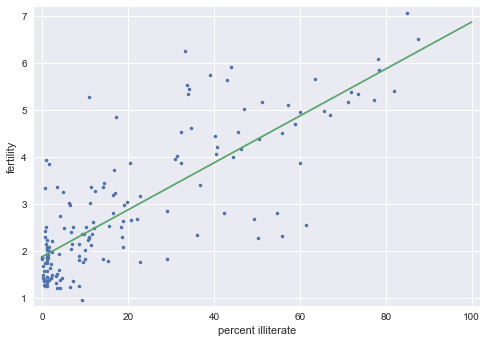

In [23]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


### How is it optimal?

The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.

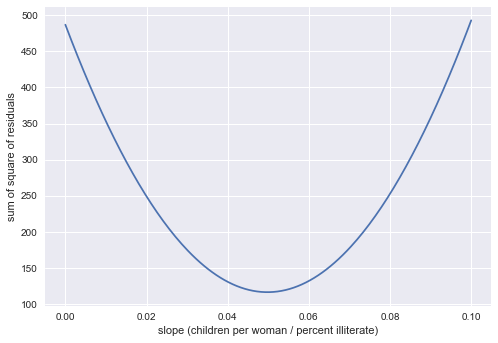

In [24]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

### Linear regression on appropriate Anscombe data

0.500090909091 3.00009090909


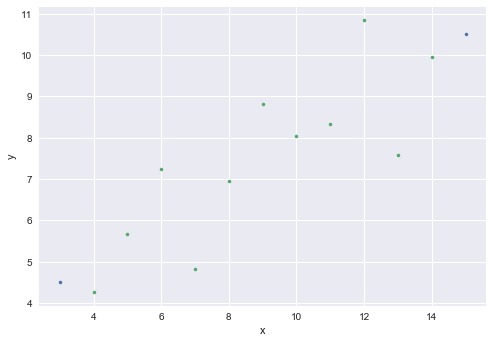

In [26]:
x = [ 10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.]
y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x_theor, y_theor, marker=".", linestyle='none')
_ = plt.plot(x, y, marker=".", linestyle='none')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()



In [30]:

# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)
    
    
# slope: 0.500090909091 intercept: 3.00009090909
# slope: 0.5 intercept: 3.00090909091
# slope: 0.499727272727 intercept: 3.00245454545
# slope: 0.499909090909 intercept: 3.00172727273
    

ValueError: only 2 non-keyword arguments accepted

## Bootstrap confidence intervals

To "pull yourself up by your bootstraps" is a classic idiom meaning that you achieve a difficult task by yourself with no help at all. In statistical inference, you want to know what would happen if you could repeat your data acquisition an infinite number of times. This task is impossible, but can we use only the data **we actually have to get close to the same result as an infinitude of experiments?** The answer is yes! The technique to do it is aptly called bootstrapping. This chapter will introduce you to this extraordinarily powerful tool.

Bootstrapping consists in making a simulation resampling the data with replacement. Then, we use resampled data to perform statistical inference. Each resampled array is called a bootstrap sample. A boostrap replicate is statistic computed from a resampled array. 

### Confidence intervals

A confidence interval gives an estimated range of values which is likely to include an unknown population parameter, the estimated range being calculated from a given set of sample data. (Definition taken from Valerie J. Easton and John H. McColl's Statistics Glossary v1.1).

#### Example

Suppose a student measuring the boiling temperature of a certain liquid observes the readings (in degrees Celsius) 102.5, 101.7, 103.1, 100.9, 100.5, and 102.2 on 6 different samples of the liquid. He calculates the sample mean to be 101.82. If he knows that the standard deviation for this procedure is 1.2 degrees, what is the confidence interval for the population mean at a 95% confidence level?

In other words, the student wishes to estimate the true mean boiling temperature of the liquid using the results of his measurements. If the measurements follow a normal distribution, then the sample mean will have the distribution N(mu,sigma/sqrt(n)). Since the sample size is 6, the standard deviation of the sample mean is equal to 1.2/sqrt(6) = 0.49.

The selection of a confidence level for an interval determines the probability that the confidence interval produced will contain the true parameter value. Common choices for the confidence level C are 0.90, 0.95, and 0.99. These levels correspond to percentages of the area of the normal density curve. For example, a 95% confidence interval covers 95% of the normal curve -- the probability of observing a value outside of this area is less than 0.05. Because the normal curve is symmetric, half of the area is in the left tail of the curve, and the other half of the area is in the right tail of the curve. As shown in the diagram to the right, for a confidence interval with level C, the area in each tail of the curve is equal to (1-C)/2. For a 95% confidence interval, the area in each tail is equal to 0.05/2 = 0.025.

<img src="images/confdiag.gif" />

The value z* representing the point on the standard normal density curve such that the probability of observing a value greater than z* is equal to p is known as the upper p critical value of the standard normal distribution. For example, if p = 0.025, the value z* such that P(Z > z*) = 0.025, or P(Z < z*) = 0.975, is equal to 1.96. For a confidence interval with level C, the value p is equal to (1-C)/2. A 95% confidence interval for the standard normal distribution, then, is the interval (-1.96, 1.96), since 95% of the area under the curve falls within this interval.

In [31]:
rainfall = np.genfromtxt('datasets/rainfall.txt', delimiter=',') #load ndarray from textfile

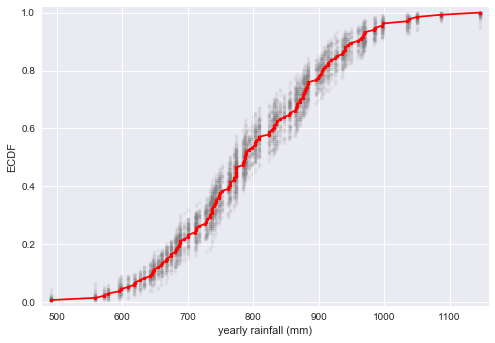

In [62]:
# Generate 50 boostrap samples and plot the ecdf for each one

for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))
    # print(bs_sample[:10])
    
    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1) # plot the boostrap samples faded

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.', color="red") # the original data 

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()


In [53]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data))) # returns func of a boostrap sample from data

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

### Bootstrap replicates of the mean and the SEM

Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

sem  10.5105491505
bs_std:  10.4365294924


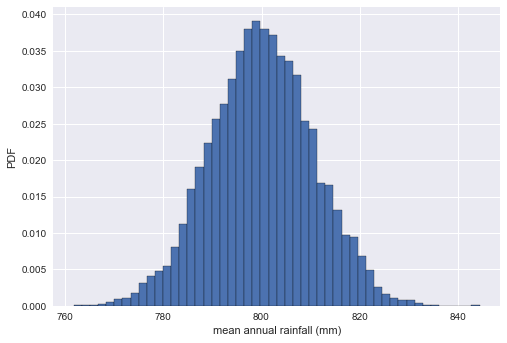

In [74]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print("sem ", sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print("bs_std: ", bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True, edgecolor="black")
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Confidence intervals of rainfall data

A confidence interval gives bounds on the range of parameter values you might expect to get if we repeated our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can just take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

**Using your bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as bs_replicates.**

In [47]:
bs_replicates = np.genfromtxt('datasets/bs_replicates.txt', delimiter=',') #load ndarray from textfile

percentiles = np.array([2.5, 97.5])
ptiles_vers = np.percentile(bs_replicates, percentiles)

print(ptiles_vers[0], ptiles_vers[-1])

779.769924812 820.950432331


### Bootstrap replicates of other statistics


13599.7684482


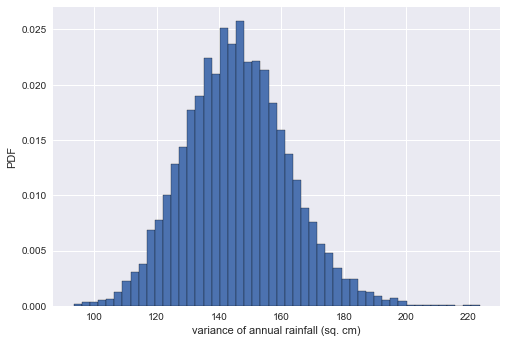

In [64]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates

# def draw_bs_reps(data, func, size=1) return an array of bootstrap replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

print(bs_replicates[0])

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True, edgecolor = 'black')
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


### Confidence interval on the rate of no-hitters

95% confidence interval = [ 661.35707171  871.0564741 ] games


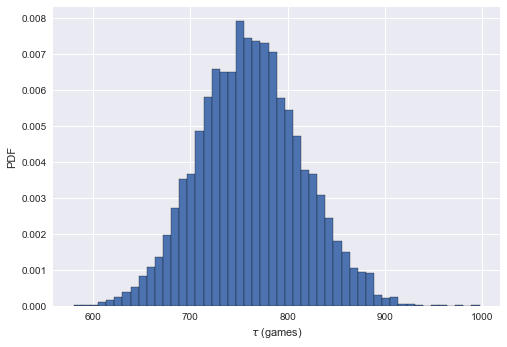

In [46]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True, edgecolor='black')
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### A function to do pairs bootstrap (x,y)

When we computed bootstrap confidence intervals we did **nonparemetrically inference**. We did not assumed any model underlying the data. The estimates where obtained using the data alone. When we used a linear regression, we were using a linear model which has two paremeters: intercept and slope. This is a **paremetric estimate**: we are going to get a different optimal parameters value if we get the data again.   

Pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using np.polyfit(). We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of x,y data.

In [58]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


### Pairs bootstrap of literacy/fertility data

1000
[ 0.04408989  0.05517863]


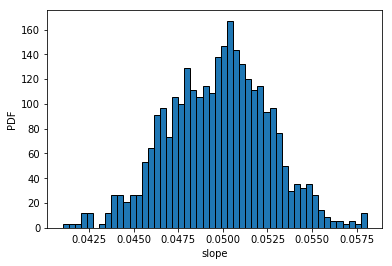

In [6]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000) #1000 bs samples

print(len(bs_slope_reps))

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5])) # you can get the confidence using the slope

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True, edgecolor='black')
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

### Plotting bootstrap regressions

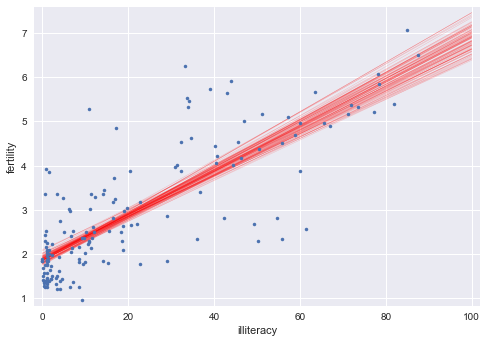

In [51]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker=".", linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

## Introduction to hypothesis testing

You now know how to define and estimate parameters given a model. But the question remains: 

> **Hypothesis testing: how reasonable the observed data are, assuming a hypothesis is true**

This question is addressed by **hypothesis tests**. They are the icing on the inference cake. Let's suppose we compare the 2008 state election results, for two similar states: Ohio and Pennsylvania. They both are similar in terms of geography and idiosyncrasies, so we could say that -hypothesis-: 

> "the county level voting for these two states, have an identical probability distributions".  

This is usually called the **Null hypothesis**: there is no significant difference between specified populations, any observed difference being due to sampling or experimental error. We could draw the ECDF vs the percent vote for Obama, and also compare the summary statistics -mean, median and std dev-. The results are similar but not conclusive to make such assertation as the comparison doesn't throw identical numbers. 

To resolve this issue, we can simulate what the data look like if the county level voting were identically distributed. We can do that, putting all the data together ignoring which states they belong to, and scramble the data. Basically is like getting the data again if there is no difference between the two states. This technique is called **permutation**. We put all the data entries together (concadenate), random reordering of entries in the array (random permutation of the concadenated data), and then label the data again (split the permutated data to get two different arrays again). 


### Permutations

Permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

Remember, a permutation sample of two arrays having respectively n1 and n2 entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first n1 entries as the permutation sample of the first array and the last n2 entries as the permutation sample of the second array.

### Generating a permutation sample

In [53]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

### Visualizing permutation sampling

Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. July and November rainfall are not identically distributed.


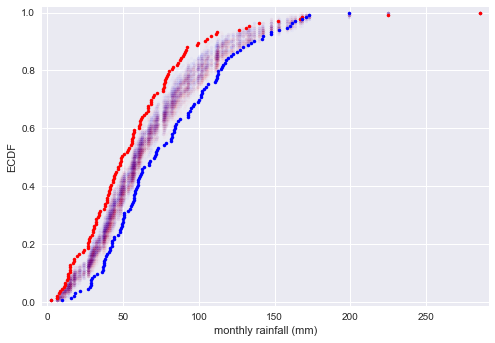

In [54]:
rain_july = np.genfromtxt('datasets/rain_july.txt', delimiter=',') #load ndarray from textfile
rain_november = np.genfromtxt('datasets/rain_november.txt', delimiter=',') #load ndarray from textfile

for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_july, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

### Test statistics and p-values

But how do we assess and how do we quantify the assessment? Well the answer is a test statistics: 
* a single number that can be computed from the observed data and from the data you simulate under the null hypothesis. 
* It serves as a basis of comparison of two: what the hypothesis predics, and what we actually observed. 

> p-value: the probability of obtaining a value of your test statistics which is at least as extreme as what was observed, under the assumption of the null hypothesis is true. IT IS NOT THE PROBABILITY THAT THE NULL HYPOTHESIS IS TRUE. 

* p-value is meaningful if the null hypothesis is clearly stated, along with the test statistics use to evaluate. 
* We have to be careful when we choose the p-value. 

#### Null hypothesis significance testing (NHST)

<img src=images/p-value.jpg />

* Statistical significance, usually attends to p-value small. 
* Statistical significance -low p-values-  and practical significance -whether or not the difference of the data of the null hypothesis matters for practical considerations- are different things.  


### Test statistics --> a chosen parameter

When performing hypothesis tests, your choice of test statistic should be:

* [_] something well-known, like the mean or median.
* [_] be a parameter that can be estimated.
* [X] be pertinent to the question you are seeking to answer in your hypothesis test.
> **The most important thing to consider is: What are you asking?**

### What is a p-value? -> a probabilty observed based on the test statistics

The p-value is generally a measure of:

[_] the probability that the hypothesis you are testing is true.
[_] the probability of observing your data if the hypothesis you are testing is true.
[X] the probability of observing a test statistic equally or more extreme than the one you observed, assuming the hypothesis you are testing is true.

### Generating permutation replicates


In [18]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2



def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

### Look before you leap: EDA before hypothesis testing


  ID  impact_force
0  A         1.612
1  A         0.605
2  A         0.327
3  A         0.946
4  A         0.541


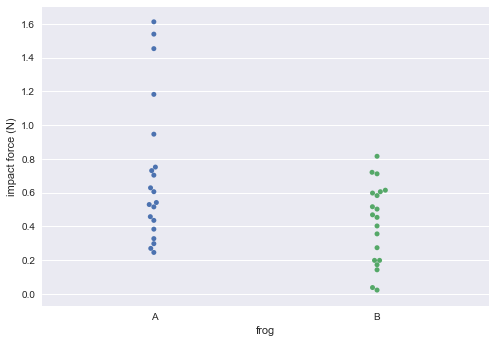

In [2]:
import seaborn as sns

df = pd.read_csv('datasets/df.txt', sep='\t', parse_dates=True, squeeze=True) # squeeze transform pandas DF to Series
print(df.head())

# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact_force', data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

### Permutation test on frog data

The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant,", but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

In [ ]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


### Bootstrap hypothesis tests

#### Pipeline for hypothesis testing

* Clearly state the null hypothesis
* Define your test statistics 
* Generate many simulated data assuming that your null hypothesis is true 
* Compute the test statistic for each simulated data set
* The p-value is the fraction of your simulated data sets for which each test estatistics is at least as extreme as for the real data


### A one-sample bootstrap hypothesis test

> The true mean of one data set A, is the value of the mean of the other data set B.

This way we are comparing the data set A against one single number of the data set B -not the two datasets-. Compare two sets of data implies bootstrapping.

Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: 

> The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [ ]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

#   p =  0.0046

### A two-sample bootstrap hypothesis test for difference of means

You performed a one-sample bootstrap hypothesis test, which is impossible to do with permutation. Testing the hypothesis that two samples have the same distribution may be done with a bootstrap test, but a permutation test is preferred because it is more accurate (exact, in fact). But therein lies the limit of a permutation test; it is not very versatile. We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution. This, too, is impossible with a permutation test.



In [ ]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


Not surprisingly, the more forgiving hypothesis, only that the means are equal as opposed to having identical distributions, gives a higher p-value. Again, it is important to carefully think about what question you want to ask. Are you only interested in the mean impact force, or the distribution of impact forces?

## Hypothesis test examples

As you saw from the last chapter, hypothesis testing can be a bit tricky. You need to define the null hypothesis, figure out how to simulate it, and define clearly what it means to be "more extreme" in order to compute the p-value. Like any skill, practice makes perfect, and this chapter gives you some good practice with hypothesis tests.

### A/B testing

Case: A redesign of a splash page of a website. We want to be able to measure if there is any improvement in the CTR after the redesign.

Experiment: get 1000 visitors, 500 are directed to the old version -splash page A- and 500 to the new or redesigned one -splash page B-. We want to determine in each case, how many users go on with the visit of the rest of the website. Let's say for splash page A we get a CTR 45% and for the splash page B we get a 67%. Could you say that the different of the two observances are only due to the redesign? Maybe it's due to random chance. 

A permutation test is a good test here. Act if like the redesign had not effect on the actual data. 

A/B testing is used in organizations to see if a strategy change gives a bette result. The null hypothesis of an A/B testing is impervious to the change. 

### Example: The vote for the Civil Rights Act in 1964

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes:  

* 153 House Democrats voted yay
* 136 Republicans voted yay
* 91 Democrats voted nay
* 35 Republicans voted nay 

>**Did party affiliation make a difference in the vote?**

To answer this question, you will evaluate the hypothesis that 

> **the party of a House member has no bearing on his or her vote.** 

To do that: 

* You will use the fraction of Democrats voting --> test statistic
* Evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. 

(That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) 

To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yay.

In [19]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yay_dems(dems, reps):
    """Compute fraction of Democrat yay votes."""
    frac =  np.sum(dems)/ len(dems)
    return frac

# Acquire permutation samples: perm_replicates

# def draw_perm_reps(data_1, data_2, func, size=1):
perm_replicates = draw_perm_reps(dems, reps, frac_yay_dems, size=10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

### What is equivalent?

Pretend you are working for a company that does all kinds of A/B tests on the user experience of its website. Which of the following situations has an equivalent set up for an A/B test as the one you just did with the Civil Rights Act of 1964?

* [_] You measure how much time each customer spends on your website before and after an advertising campaign.
* [X] You measure the number of people who click on an ad on your company's website before and after changing its color.
* [_] You measure how many clicks each person has on your company's website before and after changing the header layout.

### A time-on-website analog


In [ ]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, size=10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =',p)

# p-val = 0.0001

Your p-value if 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.

### What should you have done first?

That was a nice hypothesis test you just did to check out whether the rule changes in 1920 changed the rate of no-hitters. But what should you have done with the data first?

* [X]Performed EDA, perhaps plotting the ECDFs of inter-no-hitter times in the dead ball and live ball eras.
* [_]Nothing. The hypothesis test was only a few lines of code.

### Test correlation

Pearson correlation is a coeficient is a measure of how much of the variability into variables is due to being correlated. 

* -1 negative correlated
* +1 positive correlated 

But how could we know for sure that the two variables are really correlated and the relationship is not by chance? We can do a hypothesis test: null hypothesis, the two variables are completely uncorrelated. Now, we simulate data assuming the hypothesis is true, and use the Pearson correlation as a test statistics. The p-value is the fraction of replicates that have p as least as last observed. 

### Simulating a null hypothesis concerning correlation

The observed correlation between female illiteracy and fertility in the data set of 162 countries may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this null hypothesis in the next exercise.

To do the test, you need to simulate the data assuming the null hypothesis is true. Of the following choices, which is the best way to to do it?

* [_] Choose 162 random numbers to represent the illiteracy rate and 162 random numbers to represent the corresponding fertility rate.

* [_] Do a pairs bootstrap: Sample pairs of observed data with replacement to generate a new set of (illiteracy, fertility) data.

* [_] Do a bootstrap sampling in which you sample 162 illiteracy values with replacement and then 162 fertility values with replacement.

* [X] Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to generate a new set of (illiteracy, fertility) data.

> Yes, this exactly simulates the null hypothesis and does so more efficiently than the last option. It is exact because it uses all data and eliminates any correlation because which illiteracy value pairs to which fertility value is shuffled.

* [_] Do a permutation test: Permute both the illiteracy and fertility values to generate a new set of (illiteracy, fertility data).

> This works perfectly, and is exact because it uses all data and eliminates any correlation because which illiteracy value pairs to which fertility value is shuffled. However, it is computationally inefficient not necessary to permute both illiteracy and fertility.

### Hypothesis test on Pearson correlation

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

In [20]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)    

    # Return entry [0,1]
    return corr_mat[0,1]


In [22]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


You got a p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

### Do neonicotinoid insecticides have unintended consequences?

As a final exercise in hypothesis testing before we put everything together in our case study in the next chapter, you will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the Numpy array control) and bees treated with pesticide (stored in the Numpy array treated).

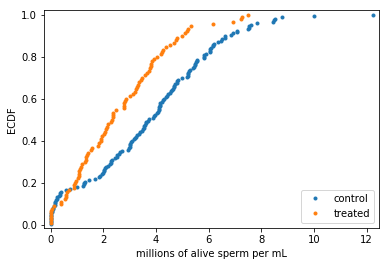

In [23]:
control = np.genfromtxt('datasets/control.txt', delimiter=',') #load ndarray from textfile
treated = np.genfromtxt('datasets/treated.txt', delimiter=',') #load ndarray from textfile

# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()


### Bootstrap hypothesis test on bee sperm counts

Now, you will test the following hypothesis: 

> On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. 

You will use the difference of means as your test statistic.


In [26]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

#    p-value = 0.0

p-value = 0.0


The p-value is small, most likely less than 0.0001, since you never saw a bootstrap replicated with a difference of means at least as extreme as what was observed.

## Putting it all together: a case study

Every year for the past 40-plus years, Peter and Rosemary Grant have gone to the Galápagos island of Daphne Major and collected data on Darwin's finches. Using your skills in statistical inference, you will spend this chapter with their data, and witness first hand, through data, evolution in action. It's an exhilarating way to end the course!

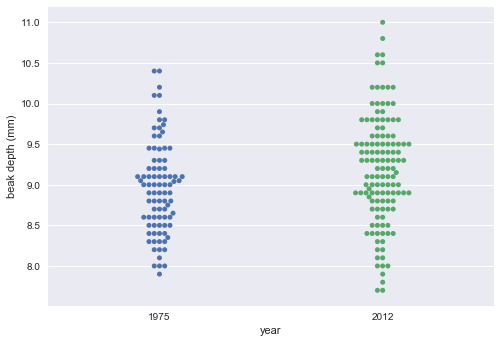

In [8]:
import seaborn as sns

# Read file and create the dataframe
df = pd.read_csv("datasets/finch_beaks_df.csv", index_col='index')

# Create bee swarm plot
_ = sns.swarmplot(x='year', y='beak_depth', data=df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
_ = plt.show()

It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

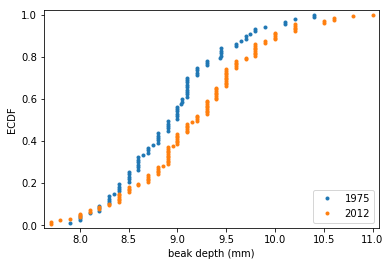

In [51]:
# bd_1975 = pd.read_csv('datasets/finch_beaks_1975.csv', dtype={"band": np.int32, "Beak length, mm" : np.float64,
                                                              #"Beak depth, mm": np.float64})
# bd_2012 = pd.read_csv('datasets/finch_beaks_2012.csv')

bd_1975 = np.genfromtxt('datasets/bd_1975.txt', delimiter=',') #load ndarray from textfile
bd_2012 = np.genfromtxt('datasets/bd_2012.txt', delimiter=',') #load ndarray from textfile

# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
_ = plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

### Parameter estimates of beak depths

Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

Since in this exercise you will use the draw_bs_reps() function you wrote in chapter 2, it may be helpful to refer back to it.

In [54]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])


# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.226220472441 mm
95% confidence interval = [ 0.05806919  0.39197357] mm


### Hypothesis test: Are beaks deeper in 2012?

Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.


In [ ]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, size=10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


We get a p-value of 0.0034, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

### EDA of beak length and depth

The beak length data are stored as bl_1975 and bl_2012, again with units of millimeters (mm). You still have the beak depth data stored in bd_1975 and bd_2012. Make scatter plots of beak depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.

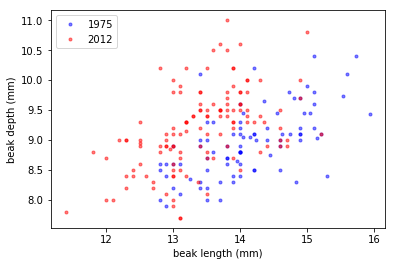

In [56]:
bl_1975 = np.genfromtxt('datasets/bl_1975.txt', delimiter=',') #load ndarray from textfile
bl_2012 = np.genfromtxt('datasets/bl_2012.txt', delimiter=',') #load ndarray from textfile

# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
_ = plt.show()

In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

### Linear regressions

Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

In [59]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, size=1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.465205169161 conf int = [ 0.32395666  0.59342416]
1975: intercept = 2.39087523658 conf int = [ 0.58241117  4.39184168]
2012: slope = 0.462630358835 conf int = [ 0.33435709  0.60896233]
2012: intercept = 2.97724749824 conf int = [ 0.99057063  4.67887803]


It looks like they have the same slope, but different intercepts.

### Displaying the linear regression results

Now, you will display your linear regression results on the scatter plot, the code for which is already pre-written for you from your previous exercise.

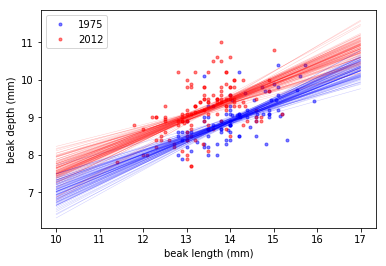

In [60]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x+bs_intercept_reps_1975[i], linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i]*x+bs_intercept_reps_2012[i],linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

### Beak length to depth ratio

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.


In [61]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.57888237719 conf int = [ 1.55682622  1.60119015]
2012: mean ratio = 1.46583422768 conf int = [ 1.44417142  1.48857371]


### How different is the ratio?

In the last exercise, you showed that the mean beak length to depth ratio was 1.58 in 1975 and 1.47 in 2012. The low end of the 1975 99% confidence interval was 1.56 mm and the high end of the 99% confidence interval in 2012 was 1.49 mm. In addition to these results, what would you say about the ratio of beak length to depth?

* [X] The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

> When the confidence intervals are not even close to overlapping, the effect is much bigger than variation. You can do a p-value, but the result is already clear.


* [_] It is impossible to say if this is a real effect or just due to noise without computing a p-value. Let me compute the p-value and get back to you.

> No, the effect size is really large. Remember, the size of the effect is most important; the p-value is in this case, just the icing on the cake.


### EDA of heritability

One of the hypothesis to explain why the beak is increasing is that the Geospiza Scandens is jeopardized by other endemic species like Geospiza Fortis. However to prove this, we need to know how this parental treats are inherited by the offspring.  

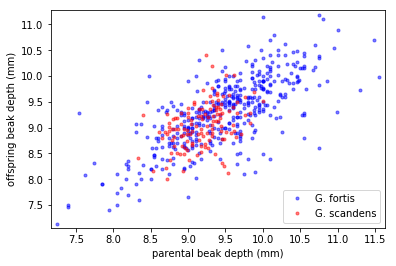

In [63]:
bd_parent_fortis = np.genfromtxt('datasets/bd_parent_fortis.txt', delimiter=',') #load ndarray from textfile
bd_parent_scandens = np.genfromtxt('datasets/bd_parent_scandens.txt', delimiter=',') #load ndarray from textfile
bd_offspring_fortis = np.genfromtxt('datasets/bd_offspring_fortis.txt', delimiter=',') #load ndarray from textfile
bd_offspring_scandens = np.genfromtxt('datasets/bd_offspring_scandens.txt', delimiter=',') #load ndarray from textfile

# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Set margins
plt.margins(0.02)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()


It appears as though there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation next.

### Correlation of offspring and parental data

In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

In [64]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

### Pearson correlation of offspring and parental data

The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

In [67]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, size=1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)


G. scandens: 0.41170636294 [ 0.27187755  0.54641317]
G. fortis: 0.728341239552 [ 0.66875594  0.77904727]


It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.

### Measuring heritability

Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

In [68]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
         bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)


G. scandens: 0.548534086869 [ 0.35496591  0.75867254]
G. fortis: 0.722905191144 [ 0.64895866  0.8008173 ]


Here again, we see that G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.

### Is beak depth heritable at all in *G. scandens*?

The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. To do this, you will do a pairs permutation test.

In [69]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. If you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.